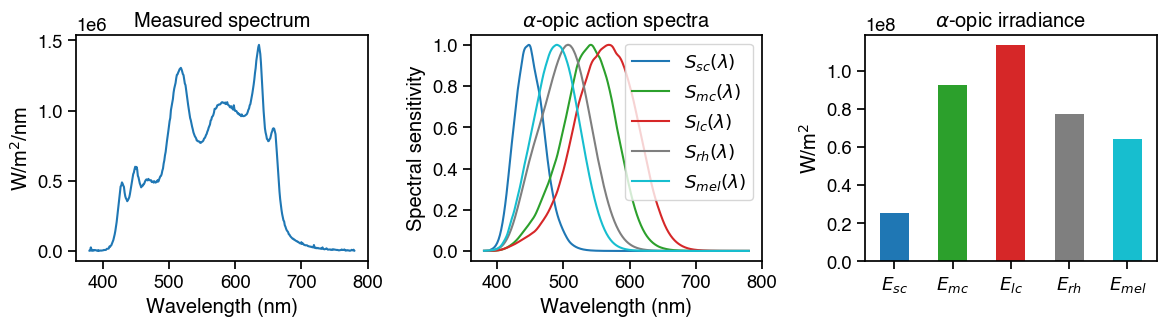

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.2)
from pysilsub.observers import StandardColorimetricObserver
from pysilsub.devices import StimulationDevice

device = StimulationDevice.from_package_data('STLAB_1_York')
spec = device.predict_multiprimary_spd([.5]*10)
observer = StandardColorimetricObserver()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5))
ax1.plot(spec)
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('W/m$^2$/nm')
ax1.set_title('Measured spectrum')
observer.plot_action_spectra(ax=ax2)
observer.action_spectra.T.dot(spec).plot(
    ax=ax3, 
    kind='bar', 
    color=observer.photoreceptor_colors.values(),
    rot=0)
ax2.set_title('$\\alpha$-opic action spectra')
h, l = ax2.get_legend_handles_labels()
l = ['$S_{'+lab+'}(\lambda)$' for lab in l]
ax2.legend(h,l)

ax3.set_ylabel('W/m$^2$')
ax3.set_title('$\\alpha$-opic irradiance')
xticks = ax3.get_xticklabels()
for tl in xticks:
    label = '$E_{' + tl.get_text() + '}$'
    tl.set_text(label)
ax3.set_xticklabels(xticks)

plt.tight_layout()
plt.savefig('../../img/alphaopic_irradiance.svg')